# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

### Solution to (1)

Here we define a function which will allow us to visualize 10 examples for each digit in a 10x10 grid.

70000


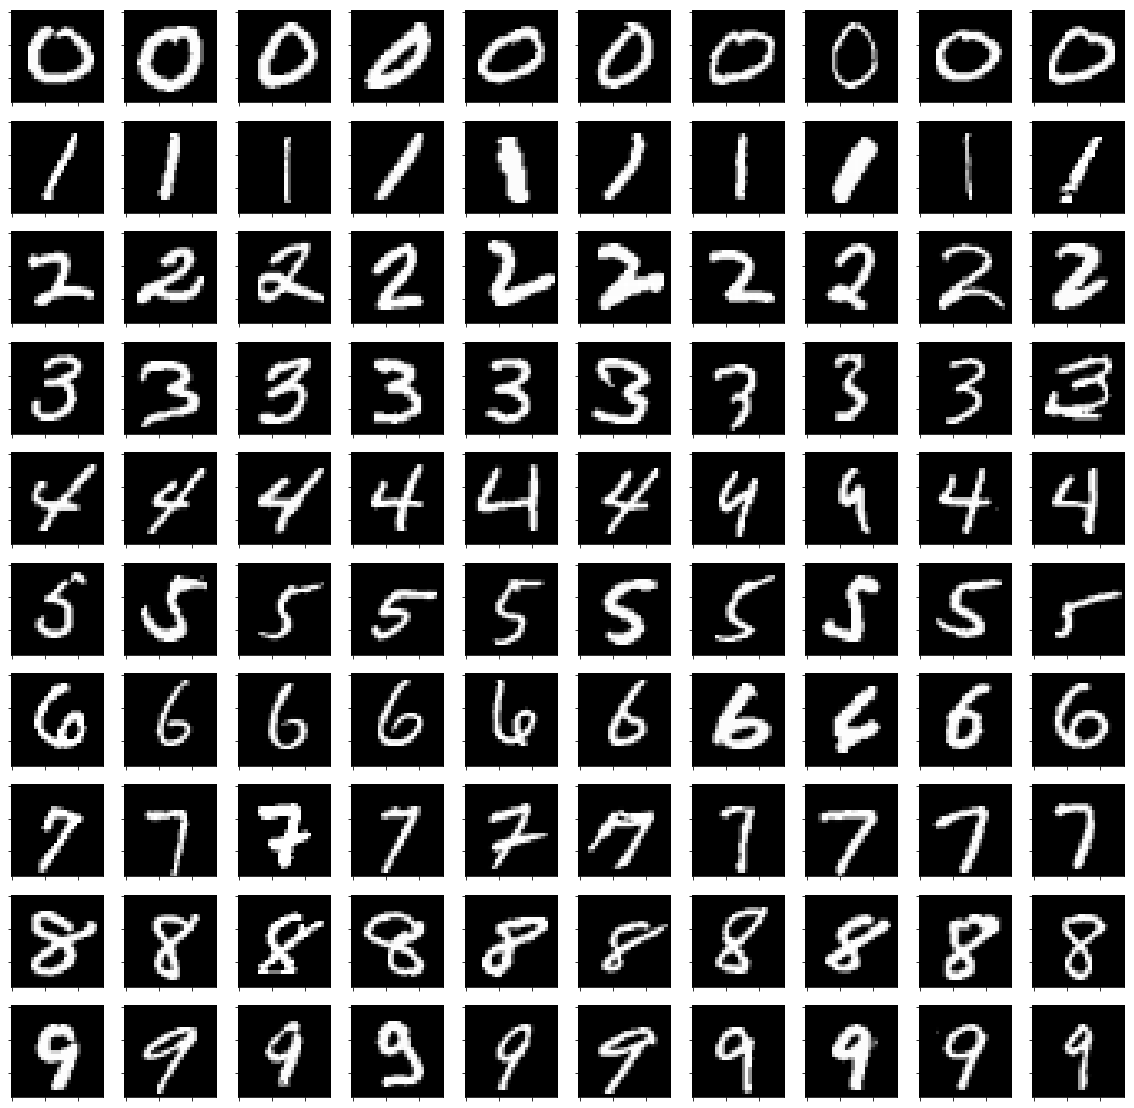

In [15]:
def P1(num_examples=10):
    # Get number of unique labels
    z=np.unique(Y)
    #Set the size of output grid 
    plt.rcParams['figure.figsize'] = 20, 20
    # For each label in 0-9 choose first 10 examples of each from X
    for i in z:
        
        
        digitX=X[Y==int(i)][0:10]
        
        for j in range(num_examples):
            
            plotX=np.reshape(digitX[j],(28,28))
            ax1=plt.subplot(10, 10,int(i*10)+int(j+1))
            ax1.axes.xaxis.set_ticklabels([])
            ax1.axes.yaxis.set_ticklabels([])
            plt.imshow(plotX,cmap = 'gray')
            


P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

### Solution to (2)
Here we create a function that estimates a K-Nearest Neighbors model and iteratres through models with a number of clusters. ANSWER: 9 is the toughest digit since it has the lowest F1 score.

In [22]:
def P2(k_values):
    ### STUDENT START ###
    for i in k_values:
        print "K={0}".format(i)
        clf=KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree',p=3)
        clf.fit(mini_train_data,mini_train_labels)
        print classification_report(clf.predict(dev_data),dev_labels)


## Define a function accuracy_score that will be used throughout
def accuracy_score(pred,orig):
    return np.mean(pred==orig)
    
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K=1
             precision    recall  f1-score   support

        0.0       0.98      0.92      0.95       105
        1.0       0.99      0.90      0.95       115
        2.0       0.80      0.98      0.88        84
        3.0       0.88      0.81      0.84        94
        4.0       0.83      0.90      0.86        96
        5.0       0.87      0.91      0.89        87
        6.0       0.96      0.95      0.95        99
        7.0       0.94      0.91      0.92       117
        8.0       0.91      0.93      0.92        94
        9.0       0.82      0.80      0.81       109

avg / total       0.90      0.90      0.90      1000

K=3
             precision    recall  f1-score   support

        0.0       0.99      0.89      0.94       110
        1.0       1.00      0.84      0.91       125
        2.0       0.82      0.95      0.88        88
        3.0       0.85      0.71      0.77       103
        4.0       0.85      0.89      0.87        99
        5.0       0.80      0.96  

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

### Solution to (3) 

You should get an output and results that look something like the following: 

train_size:100,time taken:0.100845098495,accuracy:0.666

train_size:200,time taken:0.186533927917,accuracy:0.783

train_size:400,time taken:0.37234711647,accuracy:0.806

train_size:800,time taken:0.748590946198,accuracy:0.872

train_size:1600,time taken:1.54141306877,accuracy:0.908

train_size:3200,time taken:3.0389559269,accuracy:0.932

train_size:6400,time taken:6.06463193893,accuracy:0.944

train_size:12800,time taken:12.3037757874,accuracy:0.95

train_size:25000,time taken:24.3065769672,accuracy:0.97

*Please see the function below*

In [24]:
def P3(train_sizes, accuracies):
    

### based on the training size randomize and choose those many units from the training set
##Initialize an array with  1's=train sizes and 0's=60,000 - train sizes
  
    timeArr=[]
    for i in train_sizes:
        
        
        arr=np.ones(i)
        arr=np.append(arr,[0 for l in range(60000-i)])
        ##Now shuffle the array to select a random sample
        np.random.shuffle(arr)
        clf = KNeighborsClassifier(n_neighbors=1)
        ##Now for each pick your training set with 1s and train the classifier 
        clf.fit(train_data[arr==1],train_labels[arr==1])
        t1=time.time()
        z=clf.predict(dev_data)
        timeArr.append(time.time() - t1)
        accuracies.append(accuracy_score(z,dev_labels))
        
    return timeArr
        


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
timeArr=P3(train_sizes, accuracies)
for a,b,c in  zip(train_sizes,timeArr,accuracies):
    print 'train_size:{0},time taken:{1},accuracy:{2}'.format(a,b,c)

train_size:100,time taken:0.100845098495,accuracy:0.666
train_size:200,time taken:0.186533927917,accuracy:0.783
train_size:400,time taken:0.37234711647,accuracy:0.806
train_size:800,time taken:0.748590946198,accuracy:0.872
train_size:1600,time taken:1.54141306877,accuracy:0.908
train_size:3200,time taken:3.0389559269,accuracy:0.932
train_size:6400,time taken:6.06463193893,accuracy:0.944
train_size:12800,time taken:12.3037757874,accuracy:0.95
train_size:25000,time taken:24.3065769672,accuracy:0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

### Solution to 4

The relationship between training size and accuracy is not linear to the linear model does not fit well. It predicts 1.02931524 for training size of 60k Even with using log it predicts accuracy of 1.03320633

In [25]:

def P4(train_sizes,accuracies):
    ### STUDENT START ###
    clf=LinearRegression()
    ## Prediction without transformation
    clf.fit(np.asarray(train_sizes), accuracies)
    print clf.predict([60000])
    ##I am applying a log transformation
    clf.fit(np.asarray(train_sizes), np.asarray(np.log(accuracies)))
    print np.exp(clf.predict([60000]))
    ### STUDENT END ###



        

accuracies=[]
#Generating training sizes
train_sizes = np.array([i for i in range(1000,31000,1000)])
#I am using P3 to calculate accuracy for different training sizes that I will use for regression
P3(train_sizes, accuracies)
#Printing the Scatter Plot
plt.rcParams['figure.figsize'] = 2,2
plt.scatter(train_sizes,accuracies,s=20)
plt.show()
#reshaping train_sizes to fit into regression
train_sizes= np.reshape(train_sizes,(train_sizes.shape[0],1))


P4(train_sizes,accuracies)

KeyboardInterrupt: 

(5) Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

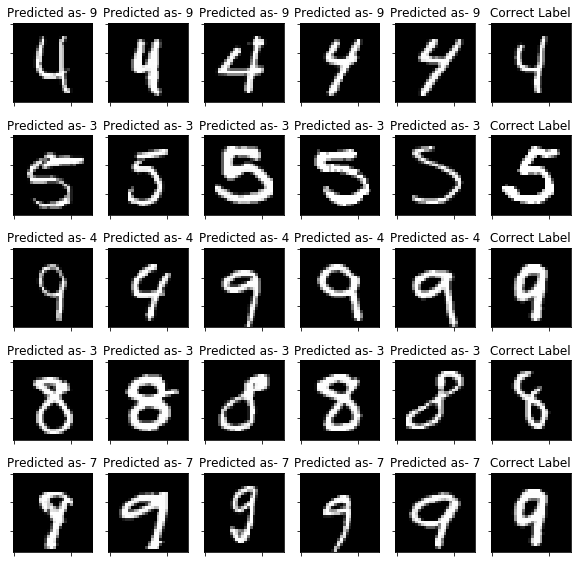

In [26]:
def P5():

### STUDENT START ###
   
    clf=KNeighborsClassifier(n_neighbors=1)
    clf.fit(mini_train_data, mini_train_labels)
    prediction=clf.predict(dev_data)
    y=confusion_matrix(prediction,dev_labels) 
    ##Using argsort to sort ascending and then ignore the last 10,choose the 5 before those and sort descedning to get the top5 elements
    top5=np.argsort(y,axis=None)[85:90][::-1]
    ##initializing a plot
    plt.rcParams['figure.figsize']=10,10
    
    for idx,num in enumerate(top5):
        ##Printing 5 erroneous prediction and 6th correct prediction
        pred_label=num/10
        classified_as=num%10
        for plotnum in range(5):
            imageToShow=dev_data[np.logical_and(dev_labels==classified_as, prediction==pred_label)][plotnum]
            imageToShow=imageToShow.reshape(28,28)
            ax1=plt.subplot(5,6,(idx*6)+(plotnum+1))
            ax1.set_xticklabels([])
            ax1.set_title('Predicted as- {0}'.format(pred_label))
            ax1.set_yticklabels([])
            plt.imshow(imageToShow,cmap='gray')   
        #Image 6th is how the correctly predicted image looks.This is provided for comparison    
        imageToShow=dev_data[np.logical_and(dev_labels==classified_as, prediction==classified_as)][0].reshape(28,28)
        ax1=plt.subplot(5,6,(idx*6)+6)
        ax1.set_xticklabels([])
        ax1.set_title('Correct Label')
        ax1.set_yticklabels([])
        plt.imshow(imageToShow,cmap='gray')      
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

In [487]:
def P6(train_data_copy):
    
### STUDENT START ###
    
    import numpy 
    ##Using weights for 9 points
    arr=[0.000229,0.005977,0.060598,0.241732,0.382928,0.241732,0.060598,0.005977,0.000229]
    
    #Here, For each point I am using 8 points horizontally & vertically to calculate the new values using the weights and value of each pixel
    #I make two passes, first horizontal then vertical
    
    for x in  range(train_data_copy.shape[0]):
        newShape=numpy.reshape(train_data_copy[x],(28,28))
        for i in range(newShape.shape[0]):
            for j in range(newShape.shape[1]):
                
                newShape[i][j]=((newShape[i][j-4]*arr[0] if j-4>=0 else 0)+(newShape[i][j-3]*arr[1] if j-3>=0 else 0)+(newShape[i][j-2]*arr[2] if j-3>=0 else 0)+(newShape[i][j-1]*arr[3] if j-1>=0 else 0)
                +(newShape[i][j]*arr[4] if j>=0 else 0)+(newShape[i][j+1]*arr[5] if j+1<newShape.shape[1] else 0)+(newShape[i][j+2]*arr[6] if j+2<newShape.shape[1] else 0)+(newShape[i][j+3]*arr[7] if j+3<newShape.shape[1] else 0)
                +(newShape[i][j+4]*arr[8] if j+4<newShape.shape[1] else 0))
           #vertical pass
        for i in range(newShape.shape[1]):
            for j in range(newShape.shape[0]):
                
                newShape[j][i]=((newShape[j-4][i]*arr[0] if j-4>=0 else 0)+(newShape[j-3][i]*arr[1] if j-3>=0 else 0)+(newShape[j-2][i]*arr[2] if j-3>=0 else 0)+(newShape[j-1][i]*arr[3] if j-1>=0 else 0)
                +(newShape[j][i]*arr[4] if j>=0 else 0)+(newShape[j+1][i]*arr[5] if j+1<newShape.shape[0] else 0)+(newShape[j+2][i]*arr[6] if j+2<newShape.shape[0] else 0)+(newShape[j+3][i]*arr[7] if j+3<newShape.shape[0] else 0)
                +(newShape[j+4][i]*arr[8] if j+4<newShape.shape[0] else 0))
        
        train_data_copy[x]=numpy.reshape(newShape,(1,train_data_copy.shape[1]))    
     
        


               
  
    '''import matplotlib.cm as cm
    plt.rcParams['figure.figsize'] = 10, 10
    
    for j in range(100):
        plotX=np.reshape(train_data_copy[j],(28,28))
            
        plt.subplot(10, 10,j+1)
        plt.imshow(plotX,cmap = cm.Greys_r)'''
             

### STUDENT END ###
from sklearn.metrics import accuracy_score
train_data_copy=mini_train_data.copy()
P6(train_data_copy)

dev_data_copy=dev_data.copy()
##Classifier 1
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(train_data_copy,mini_train_labels)
print accuracy_score(clf.predict(dev_data_copy),dev_labels)


P6(dev_data_copy)
##Classifier 2
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(mini_train_data.copy(),mini_train_labels)
print accuracy_score(clf.predict(dev_data_copy),dev_labels)

##Classifer 3
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(train_data_copy,mini_train_labels)
print accuracy_score(clf.predict(dev_data_copy),dev_labels)

  

0.893
0.846
0.902


ANSWER: As you see my results after blurring the mini train data only or after blurring both train and dev data are quite similar to it seems it should be fine not blurring the data.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [649]:
def P7(cutoffs):
    
    ### STUDENT START ###binarize=0.5
    clf=BernoulliNB(alpha=1.0, binarize=0.5)
    clf.fit(mini_train_data,mini_train_labels)
    print accuracy_score(clf.predict(dev_data),dev_labels)
    
    ## Now try Multinomial, first map the train data and dev data
    tdata_copy=mini_train_data.copy()
    ddata_copy=dev_data.copy()
    tdata_copy[tdata_copy<=cutoffs[0]]=0
    tdata_copy[np.logical_and(tdata_copy>cutoffs[0],tdata_copy<=cutoffs[1])]=1
    tdata_copy[tdata_copy>cutoffs[1]]=2
    ddata_copy[ddata_copy<=cutoffs[0]]=0
    ddata_copy[np.logical_and(ddata_copy>cutoffs[0],ddata_copy<=cutoffs[1])]=1
    ddata_copy[ddata_copy>cutoffs[1]]=2
    clf=MultinomialNB()
   
    clf.fit(tdata_copy,mini_train_labels)
    print accuracy_score(clf.predict(dev_data),dev_labels)

    
### STUDENT END ###

P7(cutoffs=[1/3,2/3])

0.815
0.79


ANSWER: As you can see, MultinomialNB does not improve accuracy since the data is binary in nature(0,1)

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [678]:
def P8(alphas):
    ### STUDENT START ###
    ##Note that I am using mini train data
    clf=BernoulliNB()
    sc=GridSearchCV(clf, alphas,scoring='accuracy')
    sc.fit(mini_train_data,mini_train_labels)
    #sc.predict(dev_data)
    return sc
    ### STUDENT END ###

alphas = {'alpha': [ 0,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print nb.best_params_
print nb.grid_scores_

{'alpha': 0.1}
[mean: 0.09200, std: 0.00080, params: {'alpha': 0}, mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}, mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}, mean: 0.82100, std: 0.02454, params: {'alpha': 0.1}, mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}, mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}, mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}, mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}]


ANSWER: For mini train data: At alpha=0, accuracy  is-> 0.82. The best value of alpha is 0.1

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

In [387]:
def P9():
    import matplotlib.pyplot as plt
   
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    gnb=GaussianNB()
    gnb.fit(train_data, train_labels)
    print accuracy_score(gnb.predict(dev_data),dev_labels)
    return gnb
    

### STUDENT END ###


### STUDENT END ###

gnb = P9()
train_data
from sklearn.metrics import accuracy_score
import numpy.random as rd
   
#rd = np.random.rand(train_data.size).reshape(train_data.shape)
#stdTrain = np.add(stdTrain, rd)
  
gnb1= GaussianNB()
gnb1.fit(mini_train_data, mini_train_labels)
gnb1.sigma_[:,:]=1
print accuracy_score(gnb1.predict(dev_data),dev_labels)

  





0.577
0.809


ANSWER: To improve the aacuracy of Gaussian classifier, I increased the variance of each feature per class so that probabilities increased from near 0 to a larger value.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:730: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[cond] = 1
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0


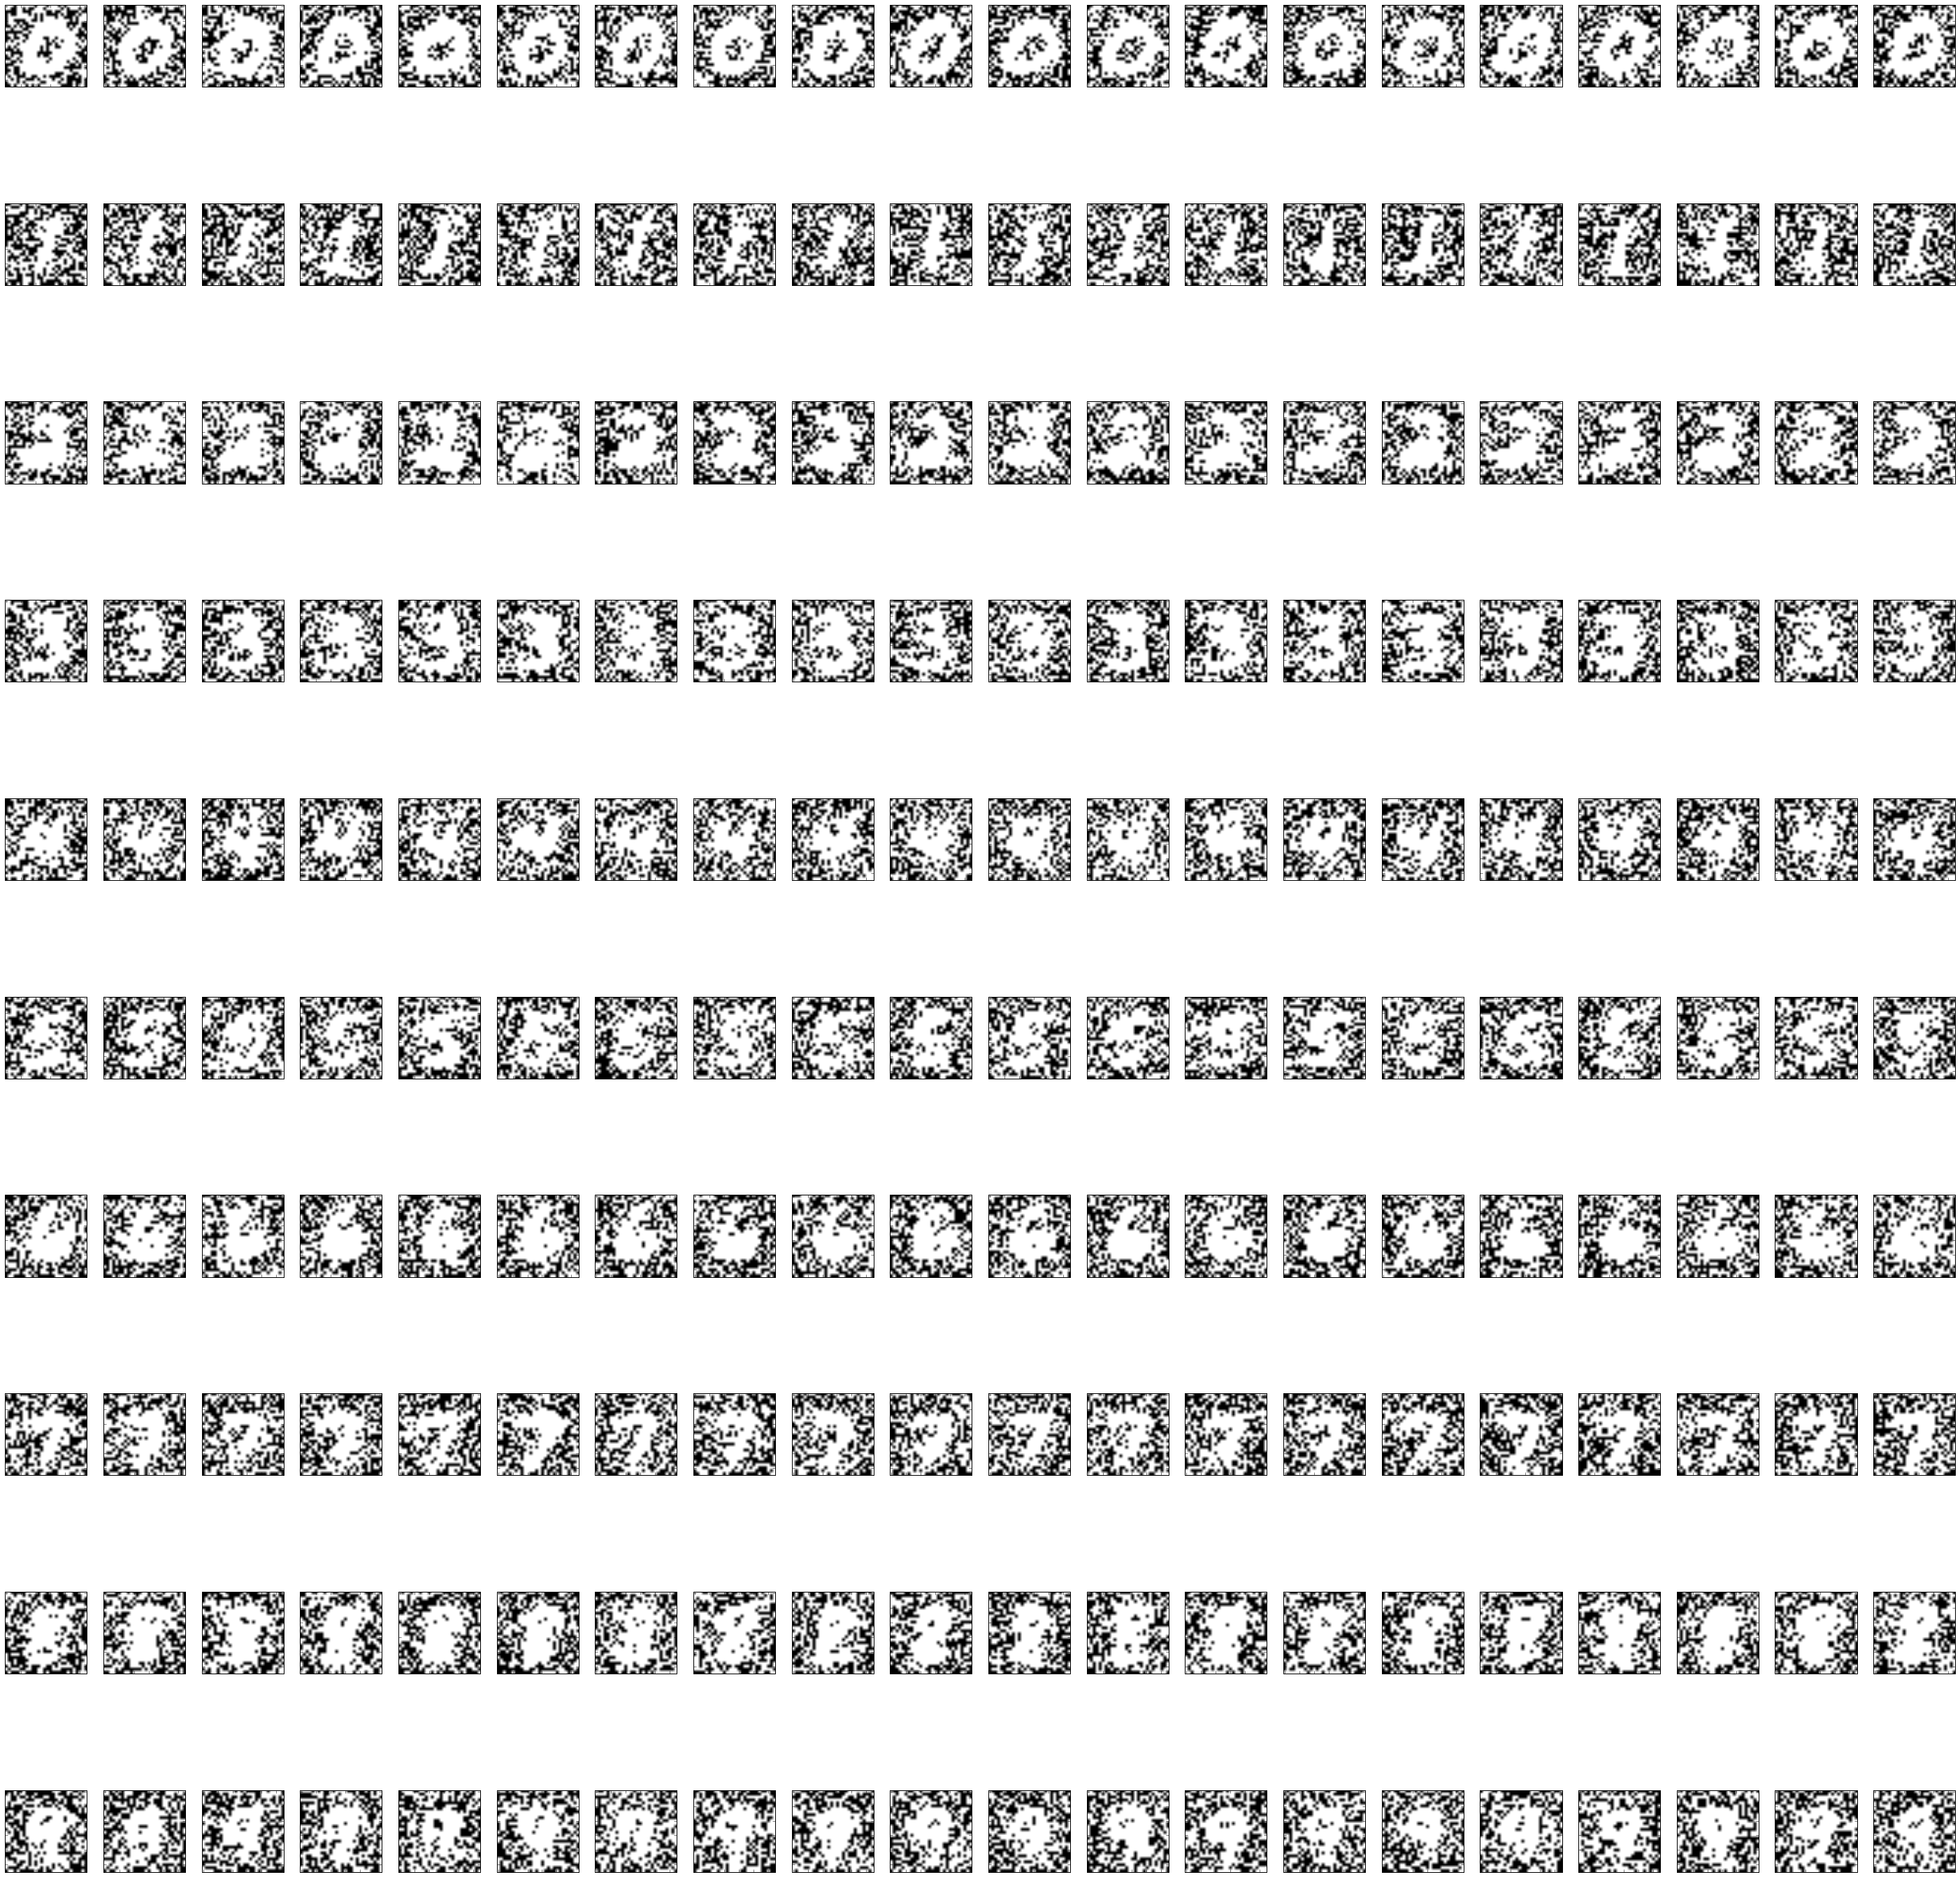

In [484]:
def P10(num_examples):
    from sklearn.naive_bayes import BernoulliNB
    clf=BernoulliNB(alpha=1.0, binarize="0.5")
    clf.fit(train_data,train_labels)
    from matplotlib import pyplot as plt
    plt.rcParams['figure.figsize'] = 50,50
   ##I am generating 20 examples of each digit
    for i in  range(10):
        for j in range(20):
            ##Adding a random noise to each of the log probabilities
            y=[0 if z<.5 else 1 for z in np.exp(clf.feature_log_prob_[i])+np.random.rand(28*28)]
            ##redrawing
            plotX=np.reshape(y,(28,28))
            ax1=plt.subplot(10,20,(i*20)+(j+1))
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            plt.imshow(plotX,cmap='gray')
            
        
    

### STUDENT START ###



### STUDENT END ###

P10(20)

ANSWER: The generated digits do not look as good as the original digits. Is there a better way of doing this?

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [710]:
def P11(buckets, correct, total):
    
    clf=BernoulliNB(binarize='0.5')
    clf.fit(train_data, train_labels)
    ##Getting the predicted probabilities of classes of eact vector of dev data 
    y=clf.predict_proba(dev_data)
    print y.shape
    ##Getting the max probability for each vector of dev data
    predArr=numpy.amax(y, axis=1)
    ##Starting with -0.1 since I want to include zeros in the first bucket
    iprev=-0.1
    for index,i in enumerate(buckets):
        ##zipping 3 arrays and broadcasting to check (given that max probability for a vector is in the bucket)
        ##whether the class that has the max probability in the vector 
        ##is same as the true class extrapolated from dev labels. If yes assign a 1 otherwise assign 0.
        resArr=[1 if iprev<c<=i and (np.where(a==c)==d)  else 0 for a,c,d in zip(y,predArr,dev_labels)]
        ##Number of vectors that were correctly identified
        correct[index]=np.count_nonzero(resArr)
        ##Number of vectors that met the bucket criteria of having the max probability in the bucket
        total[index]= len(np.where(np.logical_and(iprev<predArr, predArr<=i))[0])
        iprev=i
                

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = float(correct[i]) / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:730: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[cond] = 1
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:730: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[cond] = 1


(1000, 10)
p(pred) <= 0.5000000000000    total =   2    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  47    accuracy = 0.468
p(pred) <= 0.9990000000000    total = 107    accuracy = 0.561
p(pred) <= 0.9999900000000    total =  84    accuracy = 0.583
p(pred) <= 0.9999999000000    total =  68    accuracy = 0.765
p(pred) <= 0.9999999990000    total =  70    accuracy = 0.871
p(pred) <= 0.9999999999900    total =  83    accuracy = 0.904
p(pred) <= 0.9999999999999    total =  74    accuracy = 0.905
p(pred) <= 1.0000000000000    total = 465    accuracy = 0.978


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0


ANSWER: The calibration keeps increasing with the probability. I thikn it is weakly caliberated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

In [635]:
def P12():
    clf=BernoulliNB(alpha=0.0001,binarize='0.5')
    clf.fit(mini_train_data,mini_train_labels)
    
    print accuracy_score(clf.predict(dev_data),dev_labels)
    ##Now I will find the centroid(mean) of 28,28 shape and turn a circle of radius 10 to 
    
    my_train_data=mini_train_data.copy()
    
    for x,i in enumerate(my_train_data):
        #rshape=np.reshape(my_train_data,(1000,28,28))
        rshape=np.reshape(i,(28,28))
        print np.where(rshape>0.1)
      
        centroid= np.mean(np.where(rshape>0.1),axis=1)
        ##Turn the labels around centroid to 1
        #print centroid
        print mini_train_labels[x], centroid
        break
        rshape[int(centroid[0])]=0
        rshape[int(centroid[1])]=0
        rshape[int(centroid[0])-1]=0
        rshape[int(centroid[1])-1]=0
       
        rshape[int(centroid[0])+1]=0
        rshape[int(centroid[1])+1]=0
        ''' rshape[int(centroid[0])-2]=1
        rshape[int(centroid[1])-2]=1
        rshape[int(centroid[0])+2]=1
        rshape[int(centroid[1])+2]=1
        rshape[int(centroid[0])-3]=1
        rshape[int(centroid[1])+3]=1'''
        i=numpy.reshape(rshape,(784))

    #print my_train_data[0]
    clf=BernoulliNB(binarize='0.5')
    clf.fit(my_train_data,mini_train_labels)
    #print clf.feature_log_prob_
    my_dev_data=dev_data.copy()
    for j in my_dev_data:
        break
        #rshape=np.reshape(my_train_data,(1000,28,28))
        rshape=np.reshape(i,(28,28))
        #print np.where(rshape>0.1)
     
        centroid= np.mean(np.where(rshape>0.1),axis=1)
        ##Turn the labels around centroid to 1
        #print centroid
        
        rshape[int(centroid[0])]=0
        rshape[int(centroid[1])]=0
        rshape[int(centroid[0])-1]=0
        rshape[int(centroid[1])-1]=0
        rshape[int(centroid[0])+1]=0
        rshape[int(centroid[1])+1]=0
        '''rshape[int(centroid[0])+2]=1
        rshape[int(centroid[1])+2]=1'''
        j=numpy.reshape(rshape,(784))
    print accuracy_score(clf.predict(my_dev_data),dev_labels)
    '''nshape1=(numpy.sum(my_train_data,axis=1)/my_train_data.shape[1])
    nshape=np.expand_dims(nshape1, axis=1)
    #nshape=np.repeat(nshape,10,axis=1)
    print nshape.shape
    #print numpy.sum(my_train_data,axis=1)
    my_train_data=numpy.append(my_train_data,nshape,axis=1)
      
    print my_train_data.shape
    clf=BernoulliNB(binarize='0.5')
    clf.fit(my_train_data,mini_train_labels)
    #print clf.feature_log_prob_
    #clf.feature_log_prob_[:,784]+=2
    nshape2=(numpy.sum(dev_data,axis=1)/dev_data.shape[1])
    
    nshape3=np.expand_dims(nshape2, axis=1)
    print nshape3[dev_labels==2,]
    #nshape3=np.repeat(nshape3,10,axis=1)
    
    my_dev_data=dev_data.copy()
    #print numpy.sum(my_train_data,axis=1)
    my_dev_data=numpy.append(my_dev_data,nshape3,axis=1)
    
    print accuracy_score(clf.predict(my_dev_data),dev_labels)
    ### STUDENT START ###'''



### STUDENT END ###

P12()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:730: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[cond] = 1
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:730: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[cond] = 1
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/

0.82
(array([ 4,  4,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  9,  9,  9,
       10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15,
       15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20,
       20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23]), array([18, 19, 18, 19, 17, 18, 19, 17, 18, 19, 16, 17, 18, 19, 16, 17, 18,
       15, 16, 17, 18, 15, 16, 17, 14, 15, 16, 14, 15, 16, 13, 14, 15, 12,
       13, 14, 15, 12, 13, 14, 11, 12, 13, 14, 11, 12, 13, 11, 12, 13, 10,
       11, 12, 10, 11, 12,  9, 10, 11, 12,  9, 10, 11, 12]))
1.0 [ 14.       14.28125]
0.809


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:731: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  X[not_cond] = 0


In [ ]:
I tried a few things like calculating Centroid but that did not help